# Monte Carlo Simulation

    - Design a simple Game
    - Choose a number between 1 ad 100
    - If the sum of the chosen number exceeds 12, you win $3
    - If the sum falls below the threshold, you lose $1
    - The game will be repeated 1000 times to simulate large number of trials

In [1]:
import random

In [51]:
# Initialie variables
total_winnings = 0
total_losses = 0

# SImulate 1000 trials
for _ in range(1000):
    # Chosse a random number between 1 and 100
    chosen_number = random.randint(1,100)
    
    # Calculate the sum of digits
    digit_sum = sum(int(digit) for digit in str(chosen_number))
    
    # Check if win or loss
    if digit_sum > 12:
        total_winnings += 3
    else:
        total_losses += 1
    
# Calculate net winnings or loss
net_result = total_winnings - total_losses

# Print the results
print(f"Total winnings: ${total_winnings}")
print(f"Total losses: ${total_losses}")
print(f"Net result: ${net_result}")

Total winnings: $621
Total losses: $793
Net result: $-172


In [52]:
# Initialize a counter
count = 0
# Iterate through a number from 1 to 100
for num in range(1, 101):
    # Calculate the sum of digits
    digit_sum = sum(int(digit) for digit in str(num))
    # Check if the sum of digits is > 12
    if digit_sum > 12:
        print(num, end=" ")
        count += 1
print(f"\nTotal count: {count}")

49 58 59 67 68 69 76 77 78 79 85 86 87 88 89 94 95 96 97 98 99 
Total count: 21


# Monte Carlo Simulation on a rolling dice

## Part 1

In [7]:
import numpy as np


In [22]:
def roll_dice():
    # Simulation of rolling dice twice, minimum number we get is 1, max is 6
    # Add the result of the two simulations, so, possible values will be:
    # (1,1) or (1,2) ... (6,6) ... Sum will be between 2 and 12
    # Run Multiple times to verify
    return np.sum(np.random.randint(1,7,2))
print (roll_dice())

7


## Part 2
    - Someone approaches us saying I will give you $5 if you get 7 and take $1 if you get number other than 7
    - How do we know what will happen?
    

In [44]:
# Our own "Monte Carlo Simulation" like function
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2)   # An array, results[0] and results[1] initialized to two zeros
    for _ in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

# Test 3 times and calculate how much will you win or lose
print(monte_carlo_simulation())
print(monte_carlo_simulation())
print(monte_carlo_simulation())


[172. 828.]
[166. 834.]
[179. 821.]


## Part 3

In [47]:
# Now do it 1000 times: Take some time
results = np.zeros(1000)
for i in range(1000):
    results[i] = monte_carlo_simulation()[0]
print(results)

[178. 153. 162. 174. 151. 150. 175. 159. 154. 151. 185. 160. 160. 167.
 163. 169. 169. 154. 144. 165. 177. 179. 183. 181. 139. 160. 185. 172.
 164. 154. 161. 179. 168. 171. 165. 175. 174. 154. 203. 167. 184. 168.
 180. 169. 191. 162. 168. 165. 159. 157. 169. 160. 169. 181. 165. 157.
 199. 187. 169. 169. 179. 171. 175. 176. 160. 171. 159. 154. 150. 160.
 146. 186. 172. 152. 184. 165. 147. 156. 158. 153. 190. 152. 179. 182.
 167. 163. 155. 167. 159. 156. 164. 150. 164. 170. 178. 167. 159. 166.
 182. 165. 185. 148. 168. 157. 182. 165. 157. 167. 141. 152. 168. 154.
 176. 181. 169. 157. 174. 162. 159. 137. 153. 174. 163. 152. 168. 151.
 176. 148. 199. 159. 161. 165. 173. 155. 166. 131. 157. 179. 153. 176.
 155. 191. 173. 160. 156. 160. 171. 181. 157. 179. 172. 181. 181. 181.
 162. 150. 183. 189. 153. 148. 168. 178. 167. 157. 155. 176. 169. 140.
 169. 135. 154. 155. 162. 165. 172. 148. 154. 147. 143. 179. 165. 171.
 162. 177. 149. 173. 160. 157. 169. 145. 161. 167. 155. 144. 172. 175.
 187. 

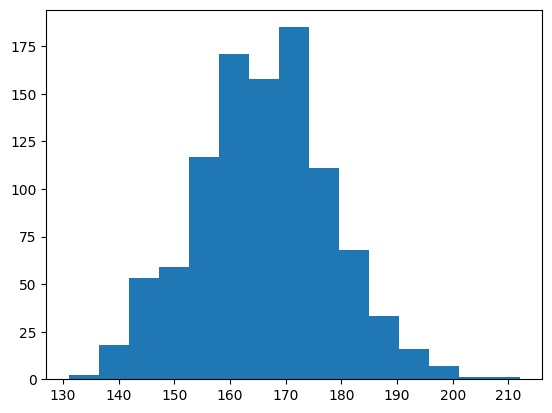

In [49]:
# Let us plot it
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(results, bins=15)
plt.show()


In [50]:
# Our win/loss
print(results.mean())               # General Mean
print(results.mean()*5)             # What we will get as win on average
print(1000- results.mean())         # What we will pay on average


165.936
829.6800000000001
834.064


# Investment Risk analysis using Monte Carlo

In [53]:
import numpy as np
import matplotlib.pyplot as plt


In [85]:
# Parameters
initial_investment = 10000  # Initial Investmetn in dollars
mean_return = 0.15          # Expected annual return
std_dev = 0.15              # Standard deviation of returns
num_simulations = 1000      # Number of Monte carlo simulations

# Monte Carlo Simulations
simulated_end_values = []
for _ in range(num_simulations):
    # Generate a random annual return for each simulation
    random_return = np.random.normal(mean_return, std_dev)
    # End value at the end of one year of investment
    end_value = initial_investment * (1 + random_return)
    # Store it in a list
    simulated_end_values.append(end_value)

In [86]:
# Results
mean_end_value = np.mean(simulated_end_values)      # Mean of all simulated end values
# Proportion of cases where we have a a loss ( End annual value < Initial investment)
risk_of_loss = np.mean(np.array(simulated_end_values) < initial_investment)
print(f"Mean end Value: ${mean_end_value:.2f}")
print(f"Probability of loss: {risk_of_loss*100:.2f}%")

Mean end Value: $11525.91
Probability of loss: 16.10%


## Exercise 1
    - The above example assumes just one year holding period. Increase it to 5 and 10 years resp and calculate similar output as above.

In [94]:
# Parameters
initial_investment = 10000  # Initial Investmetn in dollars
mean_return = 0.15          # Expected annual return
std_dev = 0.15              # Standard deviation of returns
num_simulations = 1000      # Number of Monte carlo simulations

# Monte Carlo Simulations
simulated_end_values = []
for _ in range(num_simulations):
    
    # End value at the end of one year of investment
    tmp = initial_investment
    for i in range(1,11):
        # Generate a random annual return for each simulation
        random_return = np.random.normal(mean_return, std_dev)
        # print(i, tmp)
        tmp = tmp * (1 + random_return)
    end_value = tmp
    # Store it in a list
    simulated_end_values.append(end_value)
    
# Results
mean_end_value = np.mean(simulated_end_values)      # Mean of all simulated end values
# Proportion of cases where we have a a loss ( End annual value < Initial investment)
risk_of_loss = np.mean(np.array(simulated_end_values) < initial_investment)
print(f"Mean end Value: ${mean_end_value:.2f}")
print(f"Probability of loss: {risk_of_loss*100:.2f}%")

Mean end Value: $40726.12
Probability of loss: 0.00%


## Exercise 2
    

In [ ]:
# Parameters
initial_investment = 50000  # Initial Investmetn in dollars
success_rate = 0.2          # Probability of succesful outcome
failure_loss = 0.5          # Fraction of investment lost in case of failure
success_multiplier = 10     # Multiplier on investment if successful
num_simulations = 10000

success = np.random.choice([1,0], p=[success_rate, 1-success_rate])



In [102]:

# Parameters
initial_investment = 50000  # Initial investment in dollars
success_rate = 0.2          # Probability of successful outcome
failure_loss = 0.5          # Fraction of investment lost in case of failure
success_multiplier = 10     # Multiplier on investment if successful
num_simulations = 10000     # Number of simulations

# Monte Carlo Simulation
final_values = []
for _ in range(num_simulations):
    # Simulate whether the startup succeeds (1 if success, 0 otherwise)
    success = np.random.choice([1,0], p=[success_rate, 1- success_rate])
    if success:
        final_value = initial_investment * success_multiplier
    else:
        final_value = initial_investment * (1 - failure_loss)
    final_values.append(final_value)

# Result
mean_final_value = np.mean(final_value)
risk_of_loss = np.mean(np.array(final_value) < initial_investment)

print(f"Mean Final Value: ${mean_final_value:.2f}")
print(f"Probability of Loss: {risk_of_loss*100:.2f}%")


Mean Final Value: $500000.00
Probability of Loss: 0.00%


## Exercise 3
    - In general, 5% people who take loans, default. We are still able to recover 30% of their loan amount. For a Loan amount of 
    $10,000  simulate 10000 cases to find the average loss and probability of default using Monte Carlo

In [110]:

# Parameters for Loan Default Simulation
loan_amount = 10000         # Loan amount in dollars
default_rate = 0.05         # Probability of default
recovery_rate = 0.3         # Fraction of loan amount recovered in case of default
num_loan_simulations = 10000  # Number of simulations for loan default

# Monte Carlo Simulation
final_values = []
for _ in range(num_loan_simulations):
    # Simulate whether the startup succeeds (1 if success, 0 otherwise)
    success = np.random.choice([1,0], p=[default_rate, 1- default_rate])
    if success:
        final_value = loan_amount * recovery_rate
    else:
        final_value = loan_amount * (1 - recovery_rate)
    final_values.append(final_value)

# Result
mean_final_value = np.mean(final_value)
risk_of_loss = np.mean(np.array(final_value) < initial_investment)

print(f"Mean Final Value: ${mean_final_value:.2f}")
print(f"Probability of Loss: {risk_of_loss*100:.2f}%")


Mean Final Value: $7000.00
Probability of Loss: 100.00%


# Ice cream DATASET


In [1]:
# Predit ice cream sales using Monte Carlo method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data_pd/ice_cream.csv")

In [3]:
df.set_index("DATE", inplace=True)

In [4]:
# Calculate monthly growth rates
# pct_change() function calculates the percentage change between the previous and current month
# If previous month contains 0, it will use NaN to avoid exceptions
df['growth_rate'] = df['IPN31152N'].pct_change()

In [66]:
# Parameters for simulation
mean_growth_rate = df['growth_rate'].mean()
std_dev_growth_rate = df['growth_rate'].std()
last_sale = df['IPN31152N'].iloc[-1]
last_date = df.index[-1]
last_date = df[round(len(df)*98/100):].index[0]
num_simulations = 1000
forecast_horizons = 36

# Monte Carlo SImulations
simulated_sales_data = []
for _ in range(num_simulations):
    monthly_sales = last_sale
    sale_data = []
    for _ in range(forecast_horizons):
        growth_rate = np.random.normal(mean_growth_rate, std_dev_growth_rate)
        monthly_sales *= (1 + growth_rate)
        sale_data.append(monthly_sales)
    simulated_sales_data.append(sale_data)

# Average sales prediction for each month
mean_sales_per_month = np.mean(simulated_sales_data, axis=0)



In [68]:
last_date

'2019-02-01'

In [95]:
future_dates = []
# Loop through the number of month to generate
for i in range(1, forecast_horizons+1):
    future_date = pd.to_datetime(last_date) + pd.DateOffset(months=i)
    future_dates.append(future_date)

In [96]:
# Create a dataframe for predictions
predicted_sales_df = pd.DataFrame({
    "DATE": future_dates,
    "Predicted_Sales": mean_sales_per_month
})
predicted_sales_df

,DATE,Predicted_Sales
0,2019-03-01,84.327256
1,2019-04-01,85.107730
2,2019-05-01,86.170238
3,2019-06-01,86.710787
4,2019-07-01,87.155702
5,2019-08-01,87.946778
6,2019-09-01,88.502964
7,2019-10-01,88.722560
8,2019-11-01,89.890655
9,2019-12-01,90.439588


In [97]:
# Results
mean_total_sales = np.sum(mean_sales_per_month)
risk_of_decline = np.mean([np.sum(sale_data) < (12 * last_sale) for sale_data in simulated_sales_data])
print(f"\nExpected Total Sales (NExt 3 Years): ${mean_total_sales:.2f}")
print(f"\nProbability of decline in total sales: {risk_of_decline*100:.2f}%")



Expected Total Sales (NExt 3 Years): $3476.15

Probability of decline in total sales: 0.30%


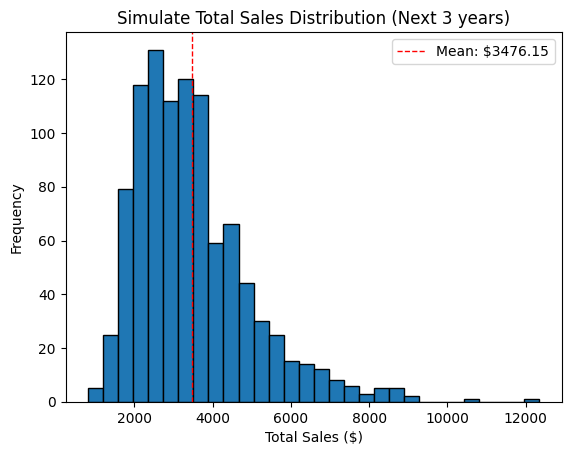

In [98]:
# Visulaization
plt.hist([np.sum(sale_data) for sale_data in simulated_sales_data], bins=30, edgecolor='k')
plt.title('Simulate Total Sales Distribution (Next 3 years)')
plt.xlabel('Total Sales ($)')
plt.ylabel('Frequency')
plt.axvline(mean_total_sales, color='red', linestyle='dashed', linewidth=1, label=f"Mean: ${mean_total_sales:.2f}")
plt.legend()
plt.show()

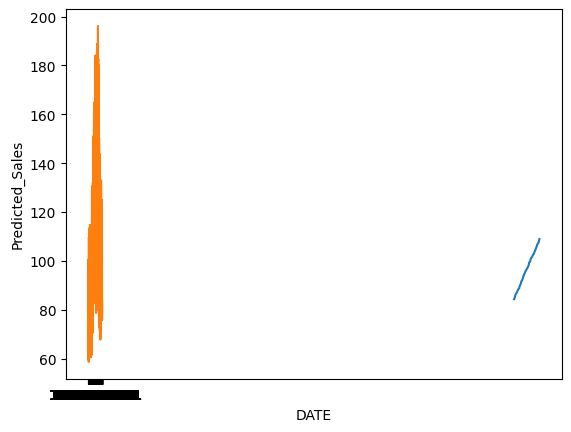

In [99]:
import seaborn as sns
sns.lineplot(data=predicted_sales_df, x=predicted_sales_df['DATE'], y=predicted_sales_df['Predicted_Sales'])
sns.lineplot(data=df, x=df.index, y=df['IPN31152N'])
plt.show()

In [100]:
df.index

Index(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01', '1972-05-01',
       '1972-06-01', '1972-07-01', '1972-08-01', '1972-09-01', '1972-10-01',
       ...
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='object', name='DATE', length=577)

In [101]:
predicted_sales_df['DATE']

0    2019-03-01
1    2019-04-01
2    2019-05-01
3    2019-06-01
4    2019-07-01
5    2019-08-01
6    2019-09-01
7    2019-10-01
8    2019-11-01
9    2019-12-01
10   2020-01-01
11   2020-02-01
12   2020-03-01
13   2020-04-01
14   2020-05-01
15   2020-06-01
16   2020-07-01
17   2020-08-01
18   2020-09-01
19   2020-10-01
20   2020-11-01
21   2020-12-01
22   2021-01-01
23   2021-02-01
24   2021-03-01
25   2021-04-01
26   2021-05-01
27   2021-06-01
28   2021-07-01
29   2021-08-01
30   2021-09-01
31   2021-10-01
32   2021-11-01
33   2021-12-01
34   2022-01-01
35   2022-02-01
Name: DATE, dtype: datetime64[ns]